# Scipy Stats Jupyter Notebook

[Official Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

***

## Python Libaries

In [1]:
import random
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Collections.
import collections as co

# Specials.
import scipy.special as spec

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

***
## Plot styles

In [2]:
#default plot style
plt.style.use('seaborn')

#default plot size
plt.rcParams['figure.figsize'] = [14, 10]

***

## Scipy Stats Overview

SciPy is a third-party library for scientific computing based on NumPy. It is an extension to NumPy and offers additional functionality, including a module called scipy.stats for statistical analysis. Scipy stats offers a large number of statistical distributions, summary statistics, correlation, statistical tests and much more.Similar to the numpy random module, scipy stats allows the user to simulate based on a specific distribution.

For the purpose of the overview we will look at the following based on created adataset based on the normal distribution:
* Normal distribution
* Summary Statistics
* Frequency Statistics
* Statistical Tests

For correlation we will apply a one way ANOVA later in the notebook

#### Normal Distribution
For this overview, we will simulate 1000 data points in a normal distribution, centered around the value 3 with a standard deviation of 1. We will create another this time centered around 10 with a bigger standard deviation.

Using this data, we will visualise what these distributions looks like and apply some of the summary and frquency statistical functions scipy stats has to offer.

We will also run through example of the Student T-test as part of the scipy stats overview.

In [3]:
from scipy.stats import norm #import normal distribution from scipy stats

#dataset 1 - hardcoded values with a random state of 3 for replication
n1 = norm.rvs(loc=3,scale=1,size=1000, random_state=3)

#dataset 2 - hardcoded values with a random state of 3 for replication
n2 = norm.rvs(loc=10,scale=2,size=1000, random_state=3)

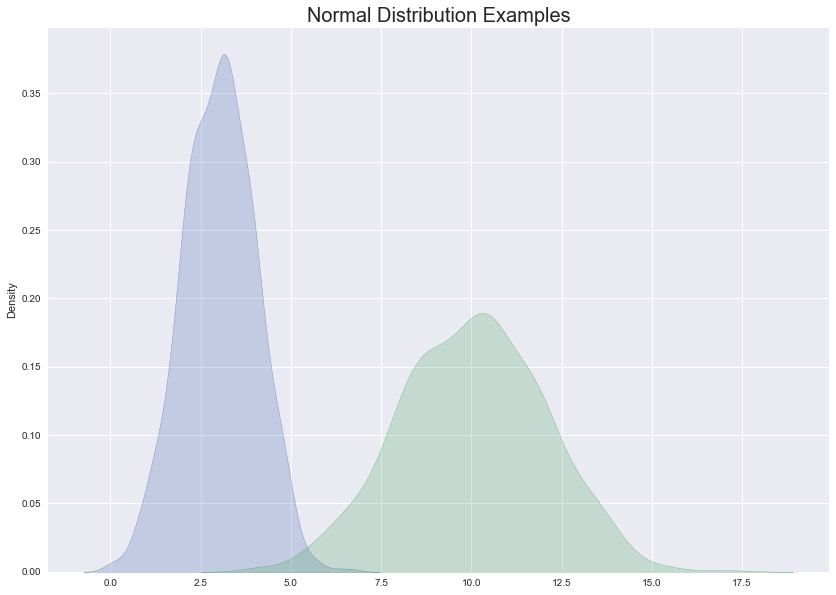

In [4]:
#visualise the nrmal distribution
plt.title('Normal Distribution Examples',fontsize=20)
sns.kdeplot(n1,fill=True)
sns.kdeplot(n2,fill=True);

Within the scipy stats module we can use a range of functions to return various summary statistics.

#### Summary Statistics

In [5]:
print("Summary Stats for dataset 1",ss.describe(n1))

print("\nSummary Stats for dataset 2",ss.describe(n2))

Summary Stats for dataset 1 DescribeResult(nobs=1000, minmax=(0.016029795118036372, 6.702458237599861), mean=3.0172843329808336, variance=1.0178922822925047, skewness=-0.007269929512760067, kurtosis=-0.06928694200380558)

Summary Stats for dataset 2 DescribeResult(nobs=1000, minmax=(4.032059590236073, 17.40491647519972), mean=10.034568665961668, variance=4.071569129170019, skewness=-0.007269929512761411, kurtosis=-0.06928694200380558)


The above summary function returns the number of samples, min and max values, the mean, variance, skewness and kurtosis.

Next we can calculte these individually using more scipy stats functions.

In [6]:
#printed results
print("Example of Summary Stats for dataset 1 with Individual Functions")
print("Rounded to two decimel places")
print("Dataset 1 mean",round(ss.tmean(n1),2))
print("Dataset 1 variance",round(ss.tvar(n1),2))
print("Dataset 1 max",round(ss.tmax(n1),2))
print("Dataset 1 min",round(ss.tmin(n1),2))
print("Dataset 1 standard deviation",round(ss.tstd(n1),2))
print("Dataset 1 skewness",round(ss.skew(n1),2))
print("Dataset 1 kurtosis",round(ss.kurtosis(n1),2))
print("Dataset 1 mode",ss.mode(n1))

Example of Summary Stats for dataset 1 with Individual Functions
Rounded to two decimel places
Dataset 1 mean 3.02
Dataset 1 variance 1.02
Dataset 1 max 6.7
Dataset 1 min 0.02
Dataset 1 standard deviation 1.01
Dataset 1 skewness -0.01
Dataset 1 kurtosis -0.07
Dataset 1 mode ModeResult(mode=array([0.0160298]), count=array([1]))


In [7]:
#printed results
print("Example of Summary Stats for Dataset 2 with Individual Functions")
print("No rounding")
print("Dataset 2 mean",ss.tmean(n2))
print("Dataset 2 variance",ss.tvar(n2))
print("Dataset 2 max",ss.tmax(n2))
print("Dataset 2 min",ss.tmin(n2))
print("Dataset 2 standard deviation",ss.tstd(n2))
print("Dataset 2 skewness",ss.skew(n2))
print("Dataset 2 kurtosis",ss.kurtosis(n2))
print("Dataset 2 mode",ss.mode(n2))

Example of Summary Stats for Dataset 2 with Individual Functions
No rounding
Dataset 2 mean 10.034568665961668
Dataset 2 variance 4.071569129170019
Dataset 2 max 17.40491647519972
Dataset 2 min 4.032059590236073
Dataset 2 standard deviation 2.017812956933823
Dataset 2 skewness -0.007269929512761411
Dataset 2 kurtosis -0.06928694200380558
Dataset 2 mode ModeResult(mode=array([4.03205959]), count=array([1]))


#### Frequency Statistics

As well as summary statistics the scipy stats module also offers many functions for frequency statistics. Here we will show an example of the cumulative frequency for Dataset 1 and 2. Dataset 1 will be use 100 bins and Dataset 2 will use 20 bins.

In [8]:
#cmf for dataset 1 wit 100 bins
res1 = ss.cumfreq(n1,numbins=100)

#cmf for dataset 2 with 20 bins
res2 = ss.cumfreq(n2,numbins=20)

x1 = res1.lowerlimit + np.linspace(0, res1.binsize*res1.cumcount.size,
                                 res1.cumcount.size)

x2 = res2.lowerlimit + np.linspace(0, res2.binsize*res2.cumcount.size,
                                 res2.cumcount.size)

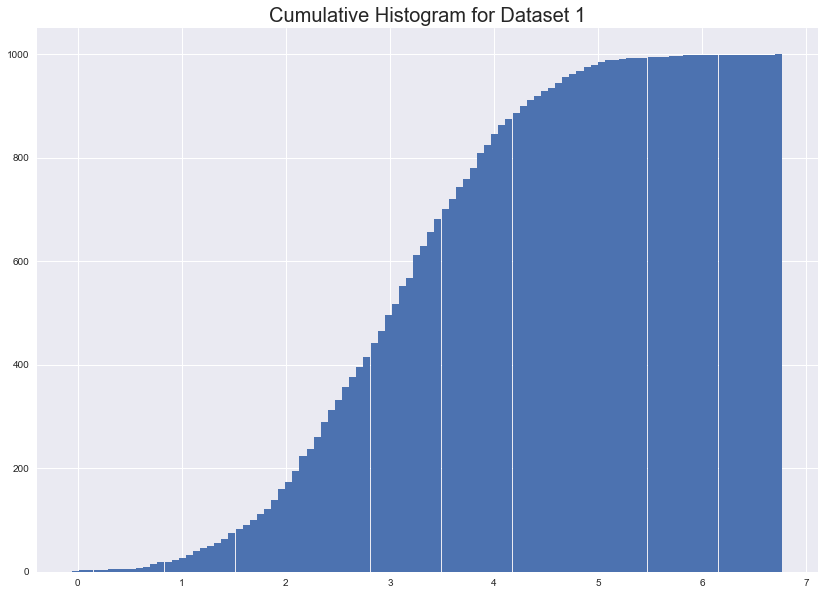

In [9]:
#plot cmf for dataset 1
plt.title("Cumulative Histogram for Dataset 1",fontsize=20)
plt.bar(x1,res1.cumcount,width=res1.binsize);
#sns.kdeplot(x1)

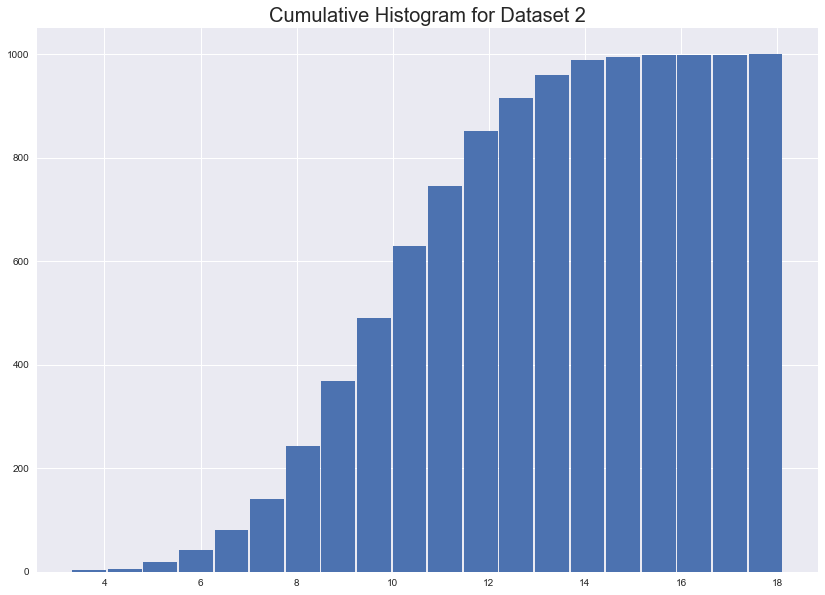

In [10]:
#cmf for dataset 2
plt.title("Cumulative Histogram for Dataset 2",fontsize=20)
plt.bar(x2,res2.cumcount,width=res2.binsize);

Another useful function in the frequency statistics is the *scoreatpercentile* function. The percentile along with the data is passed as parameters and the percentile is then returned

In [11]:
print("Example of percentiles for Dataset 1")
print("10th percentile: ",ss.scoreatpercentile(n1,10))
print("25th percentile: ",ss.scoreatpercentile(n1,25))
print("50th percentile: ",ss.scoreatpercentile(n1,50))
print("75th percentile: ",ss.scoreatpercentile(n1,75))
print("99th percentile: ",ss.scoreatpercentile(n1,99))

print("\nExample of percentiles for Dataset 2")
print("10th percentile: ",ss.scoreatpercentile(n2,10))
print("25th percentile: ",ss.scoreatpercentile(n2,25))
print("50th percentile: ",ss.scoreatpercentile(n2,50))
print("75th percentile: ",ss.scoreatpercentile(n2,75))
print("99th percentile: ",ss.scoreatpercentile(n2,99))

Example of percentiles for Dataset 1
10th percentile:  1.7410126371190968
25th percentile:  2.315646161430306
50th percentile:  3.0390500516684105
75th percentile:  3.73376865549965
99th percentile:  5.194873011630346

Example of percentiles for Dataset 2
10th percentile:  7.482025274238193
25th percentile:  8.631292322860611
50th percentile:  10.07810010333682
75th percentile:  11.467537310999301
99th percentile:  14.389746023260692


These are very useful statistical tools for summary and frequency statistics. The module also has a number of functions for statistical testing. While further in this notebook, we will see an example of ANOVA, as part of the overview of the scipy stats package we will see an example of the Student T-test 

#### Student t-test

The T-Test is used to determine if the mean (average) of two groups are truly different.

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

https://en.wikipedia.org/wiki/Student%27s_t-test

#### Types of T-Test
There are three types of T-Tests that you can run.

* Independent Sample T-Test. 
In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

* Paired Sample T-Test. 
In this test, you compare the average of two samples taken from the same population but at different points in time. A simple example would be when you would like to test the means of before and after observations taken from the same target.

* One-Sample T-Test
Test if the average of a single group is different from a known average or hypothesized average.

#### One-sample test formula


${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}}}$

#### Independent two-sample t-test

${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}}$


### Assumptions for t-test

* Dependent variable should be measured on a continuous scale.

* Independent variables should consist of two categorical, independent groups.

* Independence of observations.

* There should be no significant outliers.

* Dependent variable should be approximately normally distributed for each group of the independent variables.

* There needs to be homogeneity of variances.

***




#### Python Independent Sample T-Test
* 2 samples of 50 observations generated
* Sample A is taken from a population of mean 55 and a standard deviation of 20. 
* Sample B is taken from a population of mean 50 and a standard deviation of 15.

In [12]:
random.seed(20) #for results to be recreated
N = 50 #number of samples to take from each population
a = [random.gauss(55,20) for x in range(N)] #take N samples from population A
b = [random.gauss(50,15) for x in range(N)] #take N samples from population B

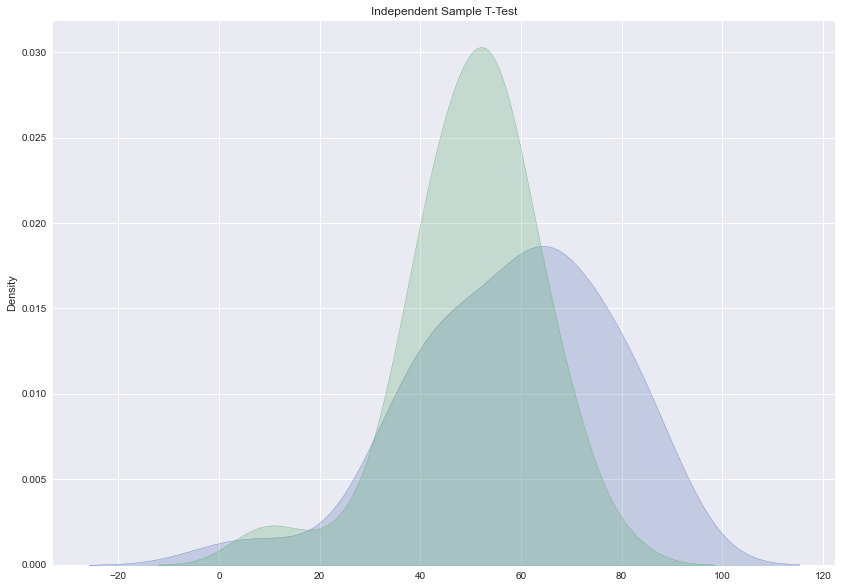

In [13]:
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test");

## * Null Hypothesis: µa = µb (the means of both populations are equal)
* Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

In [14]:
tStat, pValue = ss.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
print("\n P value less than 5%: ",pValue < 0.05)

P-Value:0.017485741540118758 T-Statistic:2.421942924642376

 P value less than 5%:  True


* There is enough evidence to reject the Null Hypothesis as the P-Value is low (typically ≤ 0.05).

In [15]:
c = [random.gauss(54,20) for x in range(N)] #take N samples from population C
d = [random.gauss(55,20) for x in range(N)] #take N samples from population D

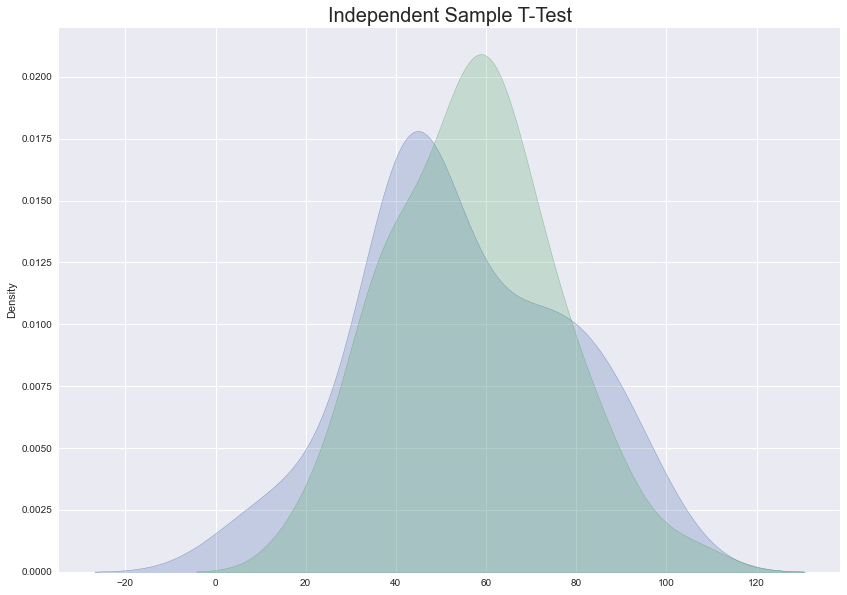

In [16]:
sns.kdeplot(c, shade=True)
sns.kdeplot(d, shade=True)
plt.title("Independent Sample T-Test",fontsize=20);

In [17]:
tStat, pValue = ss.ttest_ind(c, d, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
print("\n P value less than 5%: ",pValue < 0.05)

P-Value:0.5745272129534358 T-Statistic:-0.5633746497208574

 P value less than 5%:  False


* There is enough evidence to accept the Null Hypothesis as the P-Value is high (typically >= 0.05).

In [94]:
# Let's run 10000 t-tests where the means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s_a,s_b = 55.0, 55.0, 15.0 ,15.0 #identical mean and std dev for both normal distributions
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s_a, size=N)
    b = np.random.normal(loc=m_b, scale=s_b, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

trials = 10000
N = 100
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s_a, size=N)
    b = np.random.normal(loc=m_b, scale=s_b, size=N)
    if ss.ttest_ind(a, b)[1] > critical:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"\n{typeii:0.2f}%")

4.92%

94.96%


### One test sample

* Null Hypothesis: $µa = X$ (the population mean is equal to a mean of X)
* Alternate Hypothesis: $µa ≠ X$ (he population mean is not equal to a mean of X )

In [95]:
random.seed(20) #for results to be recreated

N = 30 #number of samples to take from each population

a = [random.gauss(50,15) for x in range(N)] #take N samples from population A

popmean = 50.5  #hypothesized population mean

In [96]:
tStat, pValue =  ss.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.5340949682112062 T-Statistic:0.6292755379958038


Since the P-Value is not low, 0.5 in this case, we fail to reject the Null Hypothesis. Statistically speaking, there is not enough evidence to conclude that the population average (mean) is not equal to 50.5.

### Hypothesis Testing basics

https://www.youtube.com/watch?v=CIbJSX-biu0

* check to accept null or alternative hypotheses


#### Null hypotheses

* assumes nothing intresting going on between whateber variables tested

#### Alternative hypotheses
* there is something intresting going on
* samples drawn from two distinct distributions


#### Stat test needs two things

* population distribution
* sample data comparing to the population

#### Chose significance level alpha $a$
* deteremines when you reject null hypothesis
* if probabilty of getting a result as extreme as the one you observe due to chance is lower than significance level, you reject null hypothesis
* probabiltity of seeing a result as extreme or more extreme than the one observed is known as the p-value

#### T-test
* Statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another


### One-sample Test

* A one-sample t-test checks whether a sample mean differs from the population mean.
* Dummy age data created for population of voters in entire country and a sample of voters in Kerry.
* Test whether the average age of voters in Kerry differs from the population

In [97]:
np.random.seed(6)

In [98]:
population_ages1 = ss.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = ss.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1,population_ages2))

In [99]:
kerry_ages1 = ss.poisson.rvs(loc=18, mu=30, size=30)
kerry_ages2 = ss.poisson.rvs(loc=18, mu=10, size=20)
kerry_ages = np.concatenate((kerry_ages1,kerry_ages2))

In [100]:
print(population_ages.mean())

43.000112


In [101]:
print(kerry_ages.mean())

39.26


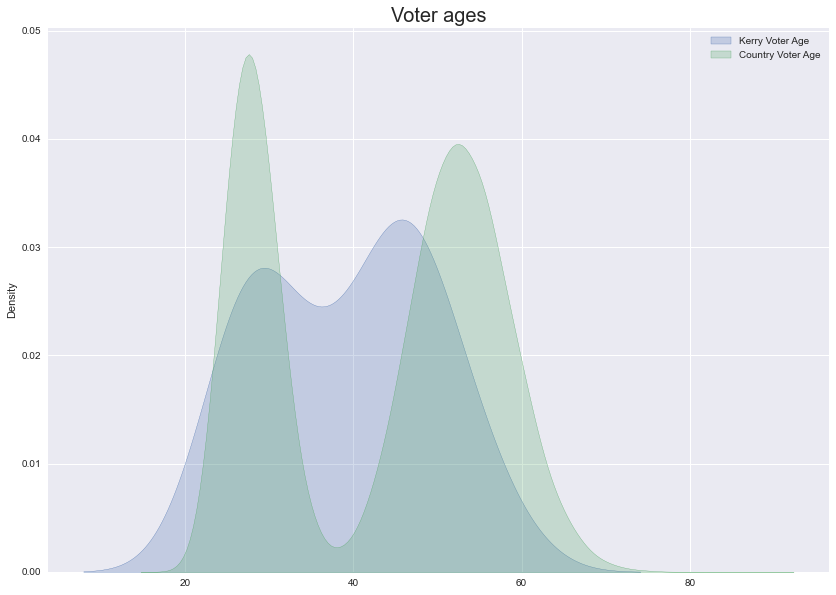

In [102]:
sns.kdeplot(kerry_ages, shade=True,label='Kerry Voter Age')
sns.kdeplot(population_ages, shade=True,label='Country Voter Age')
plt.legend()
plt.title("Voter ages",fontsize=20);

#### Conduct t-test at a 95% confidence level

* we know different metrics used to create the distributions
* does it correctly reject the null hypothesis that 'the sample comes from the same distribution as the population'

In [103]:
ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())
t_val = ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())[0]
t_val

p_val = ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())[1]
p_val

ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

* test shows "t" = -2.574
* tells us how much sample mean deviates from null hypothesis
* if t-stat lies outside quantiles of t-distribution corresponding to our confidence level and degrees of freedom, we reject null hypothesis
* pvalue less than 5%
* pvalue of 0.13 - probabiltiy of observing a difference due to chance 1.3% of the time
* rejct null hypothesis

#### check quantiles

In [104]:
#lower quantile
ss.t.ppf(q=0.025 #quantile to check
         ,df=49) # degrees of freedom N-1 

-2.0095752344892093

* -2.0009 lower quantile

In [105]:
#upper quantile 
ss.t.ppf(q=0.975,df=49)

2.009575234489209

* 2.0095 upper quantile
<br>



* if t-stat outside this range we accept altenative hypothesis
* -2.574 is outside the range so we reject null hypothesis
* will mean p-value is small

In [106]:
#pval calc
ss.t.cdf(x=t_val,df=49)*2

0.013118685425061678

* alternative hypothesis checks whether sample mean differs (not eqiual to) the population mean.
* p-value of 0.013
* expect to see data as extreme as our sample due to chance about 1.3% of the time if null hypothesis is true
* here p_value loweer than our significance level so we should reject the null hypothesis

In [107]:
sigma = kerry_ages.std()/math.sqrt(len(kerry_ages)) # smaple data/sample size

print("confidence level 95%")
ss.t.interval(0.95, #confidence level
              df=len(kerry_ages)-1, # degrees of freedom
              loc=kerry_ages.mean(), #sample mean
              scale=sigma) # standard dev estimate

confidence level 95%


(36.369669080722176, 42.15033091927782)

* 99% confidence level
* accept null


In [108]:
print("Confidence Interval 99%")
ss.t.interval(0.99, #confidence level
              df=len(kerry_ages)-1, # degrees of freedom
              loc=kerry_ages.mean(), #sample mean
              scale=sigma) # standard dev estimate

Confidence Interval 99%


(35.40547994092107, 43.11452005907893)

### Two-sample Test
* two data samples to another
* null hypothesis is both groups the dsame
* alternative is they from different distributions


In [109]:
np.random.seed(12)
cork_ages1 = ss.poisson.rvs(loc=18, mu=33, size=30)
cork_ages2 = ss.poisson.rvs(loc=18, mu=13, size=20)
cork_ages = np.concatenate((cork_ages1,cork_ages2))

In [110]:
cork_ages.mean()

42.8

In [111]:
kerry_ages.mean()

39.26

In [112]:
ss.ttest_ind(a = kerry_ages, b = cork_ages,equal_var=False)

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

* expect extreme result 9.0% of the time
* with 95% confidence we can't reject null hypothesis pvalue > 5%

### Paired T-test
* basic t-test designed for testing differences between independant groups
* sometimes need to test differences between samples in same group at differnt points in time
* eg hospital might want to test whether a weight loss drug works by checking weights of patients before and after treatment
* paired t-test used for this

In [113]:
np.random.seed(11)

before = ss.norm.rvs(scale = 30, loc= 250, size = 100)

after = before + ss.norm.rvs(scale=5,loc=-1.25,size=100)

weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change": after-before})

weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


* summary shows patients lost about 1.23 pounds on average after treatment

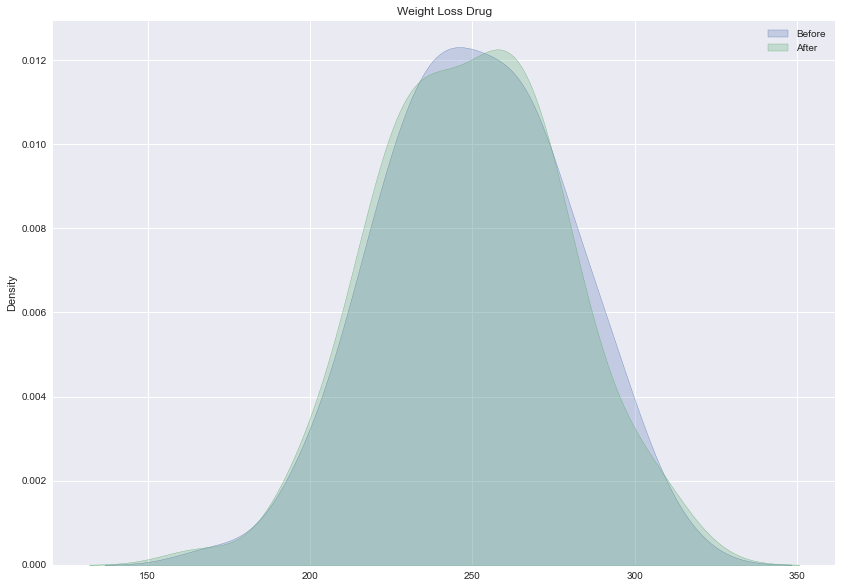

In [114]:
sns.kdeplot(before, shade=True,label='Before')
sns.kdeplot(after, shade=True,label='After')
plt.legend()
plt.title("Weight Loss Drug");

In [115]:
ss.ttest_rel(a=before,b=after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

* pval just above 1%

### Type I and Type II errors

* Type I false positive - rejecting null when its true
* type II false negative - fail to reject null hypothesis

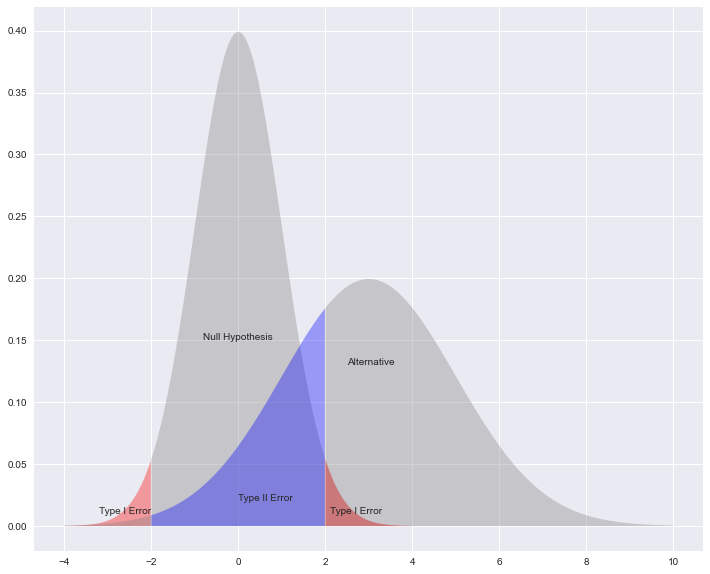

In [116]:
#ref lecture videos
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01),y1=ss.norm.pdf(np.arange(-4,-2,0.01)),facecolor='red',alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),y1=ss.norm.pdf(np.arange(-2,2,0.01)),facecolor='grey',alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01),y1=ss.norm.pdf(np.arange(2,4,0.01)),facecolor='red',alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01),y1=ss.norm.pdf(np.arange(-4,-2,0.01),loc=3,scale=2),facecolor='grey',alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),y1=ss.norm.pdf(np.arange(-2,2,0.01),loc=3,scale=2),facecolor='blue',alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01),y1=ss.norm.pdf(np.arange(2,10,0.01),loc=3,scale=2),facecolor='grey',alpha=0.35)

plt.text(x=-0.8,y=0.15, s='Null Hypothesis')
plt.text(x=2.5,y=0.13, s='Alternative')
plt.text(x=2.1,y=0.01, s='Type I Error')
plt.text(x=-3.2,y=0.01, s='Type I Error')
plt.text(x=0,y=0.02, s='Type II Error');

In [117]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a ,b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

4.69%
34.42%


***
## One-way ANOVA

* https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
* https://www.pythonfordatascience.org/anova-python/#test_with_python
* https://www.pythonfordatascience.org/parametric-assumptions-python/

****

- ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. 
- Parametric test used to test for a statistically significant difference of an outcome between 3 or more groups. 
- Since it is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others.
- However, if the ANOVA is significant one cannot tell which group is different. 
- In order to tell which group is different, one has to conduct planned or post-hoc comparisons. 
- As with all parametric tests, there are certain conditions (assumptions) that need to be met in order for the test results to be considered reliable.


The reason why it's called an one-way or one factor ANOVA even though there are 3 or more groups being tested is because those groups are under one categorical variable, such as race or education level, and the name is referring to the number of variables in the analysis and not the number of groups. If there are two variables being compared it would technically be called a two-way, or two factor, ANOVA if both variables are categorical, or it could be called an ANCOVA if the 2nd variable is continuous. The "C" doesn't stand for continuous, it stands for covariate.

***

#### Assumptions

* Assumption 1 - A dependent variable
   * should be continuous data
   * examples: hours, minutes, KG's, Exam score
   
* Assumption 2 - Independent Variable
   * should have two or more categorical independent groups (typically 3 or more)
   * t-test more common for 2 groups
   * examples: job (analyst, technichan, sales), activivty (low, medium, high), nationality (Irish, English, Scottish)
   
* Assumption 3 - Independence of observations
   * no relationship between the observations in each group or between the groups themselves
   * study design issue than something you can test

* Assumption 4 - No significant Outliers
   * outliers have a negative effect on the one-way ANOVA, reducing the validity of your results
   * boxplots for outlier detection
   
* Assumption 5 - Normal Distributed
   * gaussian distribution
   * can test for normality using the Shapiro-Wilk test of normality
  
* Assumption 6 - homogeneity of variances
   * Levene's test for homogeneity of variances
   * If data fails this assumption, need to not only carry out a Welch ANOVA but also use a different post hoc test

   
   
   

##### Create a dataset

In [118]:
rng = np.random.default_rng(42) #random seed for producing same numbers

#create datasets  - normal distributed
#dataset 1
group_a = list(rng.normal(loc=11.7,size=21)) 

#dataset 2
group_b = list(rng.normal(loc=11.8,size=20)) 

#dataset 3
group_c = list(rng.normal(loc=11.9,size=23))

In [119]:
all_groups = group_a+group_b+group_c

#concatenation of datsets
group_names = (['A']*len(group_a)) + (['B']*len(group_b)) + (['C']*len(group_c))

In [120]:
#dataframe
df = pd.DataFrame({'group':group_names,'score':all_groups})

In [121]:
#view fist few rows
df.head()

,group,score
0,A,12.004717
1,A,10.660016
2,A,12.450451
3,A,12.640565
4,A,9.748965


##### Summary Stats

In [122]:
#summry stas by group
df.groupby('group').describe()

score                                                                   \
      count       mean       std        min        25%        50%        75%   
group                                                                          
A      21.0  11.659833  0.848792   9.748965  10.846956  11.766031  12.450451   
B      20.0  11.955868  0.803982  10.959844  11.350693  11.925748  12.424633   
C      23.0  11.916282  0.761911  10.217130  11.497371  12.062753  12.464688   

                  
             max  
group             
A      12.827241  
B      13.941648  
C      13.394941

##### Assumption 1: Dependent Variable

In [123]:
#dependent variable
dependent = df['score']
dependent.head()

0    12.004717
1    10.660016
2    12.450451
3    12.640565
4     9.748965
Name: score, dtype: float64

##### Assumption 2: Independent Variable

In [124]:
#independent variable
independent = df['group']
independent

0     A
1     A
2     A
3     A
4     A
     ..
59    C
60    C
61    C
62    C
63    C
Name: group, Length: 64, dtype: object

##### Assumption 4: Outliers

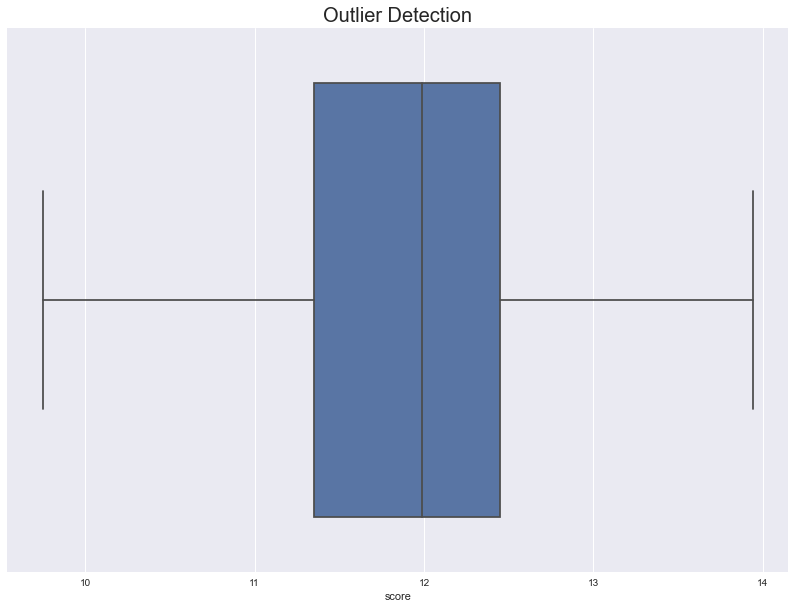

In [125]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent).set_title('Outlier Detection',fontsize=20);

* Understanding the whiskers on boxplots in code below

In [126]:
#calculate quantiles
twenty_fifth_quantile = df.score.quantile(.25)
seventy_fifth_quantile = df.score.quantile(.75)
middle_quantile = df.score.quantile(.5)

#caluclate inter quantile range
inter_quartile_range = (seventy_fifth_quantile - twenty_fifth_quantile)*1.5

upper = seventy_fifth_quantile + inter_quartile_range

lower = twenty_fifth_quantile - inter_quartile_range

#print outpu of results
print('Boxplot Assumptions based on the following: ')
print("25th Quartile: ", round(twenty_fifth_quantile,2))
print("75th Quartile: ", round(seventy_fifth_quantile,2))
print("")
print('50th Quartile: ',round(middle_quantile,2))
print('Inter Quartile range: ',round(inter_quartile_range))
print("")
print("Boxplot upper limit: ", round(upper,2))
print("Boxplot lower limit: ", round(lower,2))
print("")
print("UPPER BOXPLOT WHISKER - The 75th Quartile: ",round(seventy_fifth_quantile,2)," added with Interquartile range: ",round(inter_quartile_range,2)," sets upper whisker in the boxplot which is: ",round(seventy_fifth_quantile+inter_quartile_range,2))
print("LOWER BOXPLOT WHISKER The 25th Quartile: ",round(twenty_fifth_quantile,2)," subtraceted from Interquartile range: ",round(inter_quartile_range,2)," sets upper whisker in the boxplot which is: ",round(twenty_fifth_quantile-inter_quartile_range,2))

Boxplot Assumptions based on the following: 
25th Quartile:  11.35
75th Quartile:  12.45

50th Quartile:  11.99
Inter Quartile range:  2.0

Boxplot upper limit:  14.1
Boxplot lower limit:  9.7

UPPER BOXPLOT WHISKER - The 75th Quartile:  12.45  added with Interquartile range:  1.65  sets upper whisker in the boxplot which is:  14.1
LOWER BOXPLOT WHISKER The 25th Quartile:  11.35  subtraceted from Interquartile range:  1.65  sets upper whisker in the boxplot which is:  9.7


In [127]:
lower_outlier_count = df['score'].min() < lower
print("Values outside Lower Limit: ",lower_outlier_count)

upper_outlier_count = df['score'].max() > upper
print("Values outside Upper Limit: ",upper_outlier_count)

Values outside Lower Limit:  False
Values outside Upper Limit:  False


* No outlier value on upper limit


#### Outlier Detection by individual Group

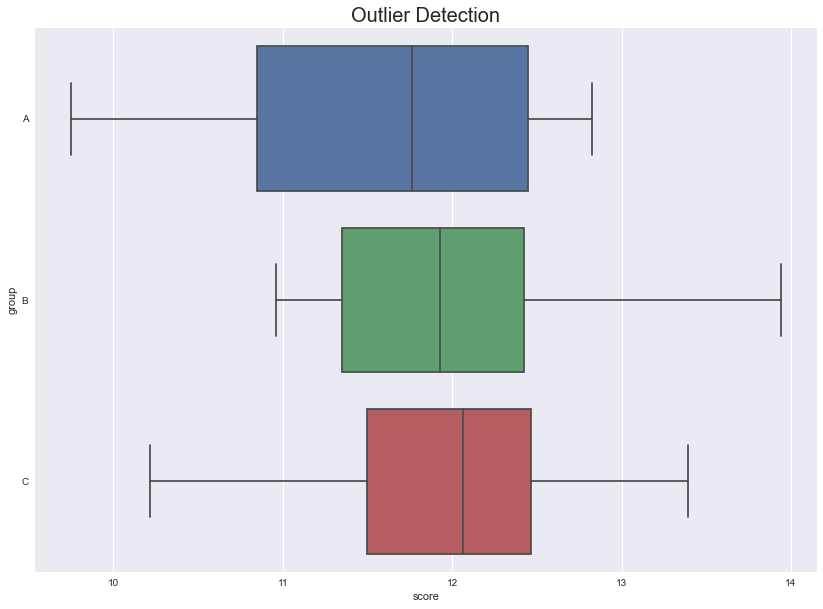

In [128]:
sns.boxplot(x=dependent, y=independent).set_title('Outlier Detection',fontsize=20);

* not outliers when looking at the data by individual group

##### Assumption 5: Normality

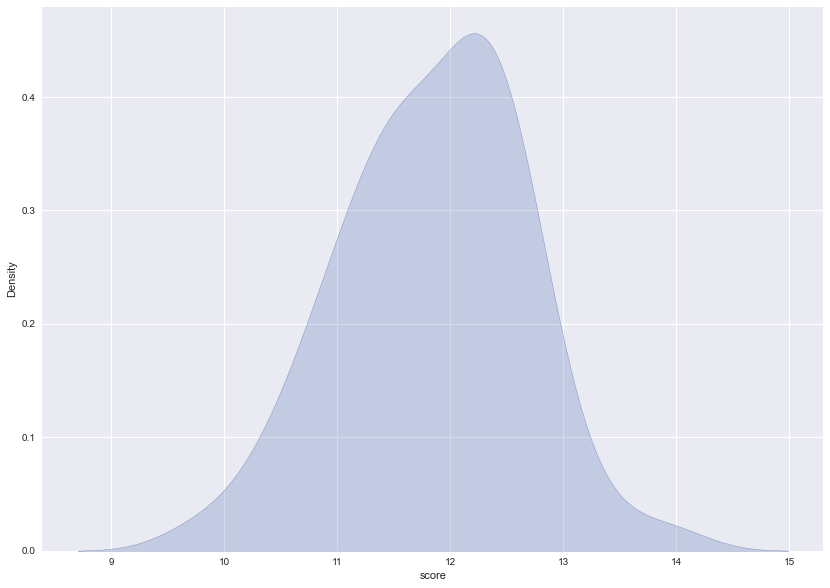

In [129]:
sns.kdeplot(dependent,fill=True);

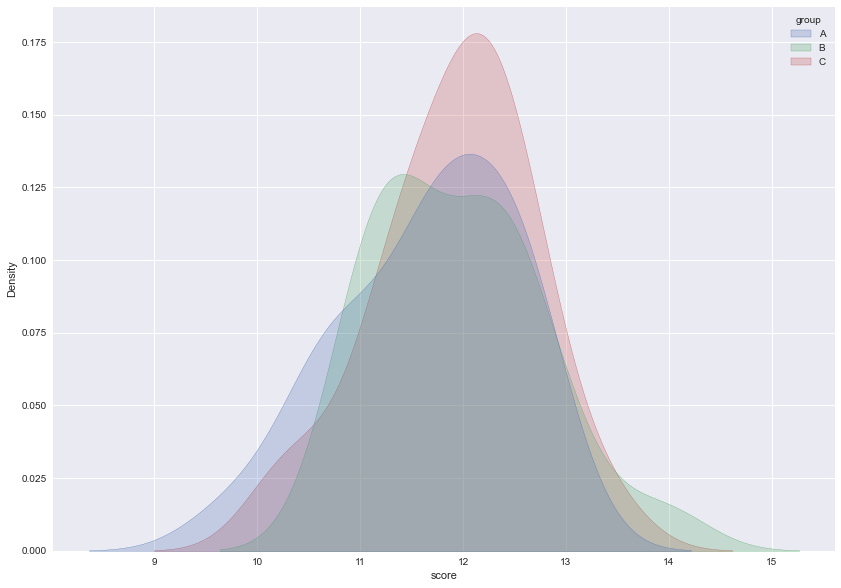

In [130]:
sns.kdeplot('score',fill=True,hue='group',data=df);

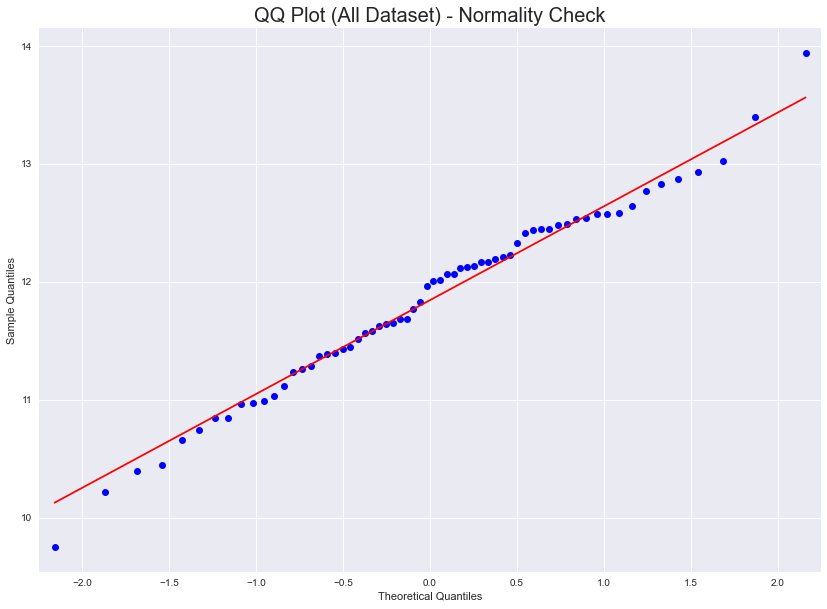

In [131]:
#qq plot to check for normality
fig = qqplot(df['score'], line='s')
plt.title('QQ Plot (All Dataset) - Normality Check',fontsize=20)
plt.show()

In [132]:
#extract group score
score_group_a = dependent[independent == 'A']
score_group_b = dependent[independent == 'B']
score_group_c = dependent[independent == 'C']


In [133]:
# run shapiro wilks test for normality
print(ss.shapiro(score_group_a))
print(ss.shapiro(score_group_b))
print(ss.shapiro(score_group_c))

# p value > 0.05 consdier data normal
print("\nNormal if p value grester than 0.05: Group A ",ss.shapiro(score_group_a)[1] > 0.05)
print("Normal if p value grester than 0.05: Group B ",ss.shapiro(score_group_b)[1] > 0.05)
print("Normal if p value grester than 0.05: Group C ",ss.shapiro(score_group_c)[1] > 0.05)

ShapiroResult(statistic=0.943315327167511, pvalue=0.2532254457473755)
ShapiroResult(statistic=0.9306995868682861, pvalue=0.15927794575691223)
ShapiroResult(statistic=0.9734027981758118, pvalue=0.7696956992149353)

Normal if p value grester than 0.05: Group A  True
Normal if p value grester than 0.05: Group B  True
Normal if p value grester than 0.05: Group C  True


##### Assumption 6: Homogeneity of Variances

In [134]:
#test for equal variances

# p < .05 unequal variance
lev = ss.levene(
    score_group_a,
    score_group_b,
    score_group_c
)
print(lev)
print("p value < 0.05 (Unequal variance): ",lev[1]<0.05)

LeveneResult(statistic=0.28679239365121956, pvalue=0.7516740987544193)
p value < 0.05 (Unequal variance):  False


##### One-way ANOVA

In [135]:
#test for equal variances

# p < .05 unequal variance
ss.f_oneway(
    score_group_a,
    score_group_b,
    score_group_c
)

F_onewayResult(statistic=0.8368304665489256, pvalue=0.4379913406312196)

* high p_value means accept null hypothesis
* low p_value means reject null hypothesis

##### Post-Hoc Testing

In [136]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [137]:
# Perform the test.
welch_anova_np(
    score_group_a,
    score_group_b,
    score_group_c 
)

F_onewayResult(statistic=0.7739552090105162, pvalue=0.46795958478311883)

* mean scores are different

***

##### Tukey Honestly Significant Difference (HSD)
* Tests all pairwise group comparisons while controlling for the multiple comparisons which protects the familywise error rate and from making a Type I error
* Not technically a "post-hoc" test since this test can be used as a test independently of the ANOVA and can be planned before hand

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.296,0.4725,-0.3076,0.8997,False
A,C,0.2564,0.5425,-0.3267,0.8396,False
B,C,-0.0396,0.9,-0.6303,0.5511,False


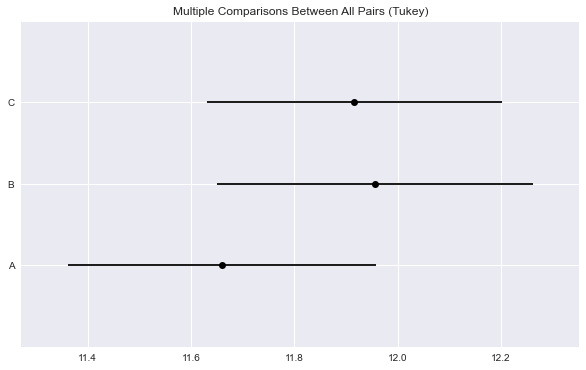

In [138]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dependent,
                          groups=independent,
                          alpha=0.05)

tukey.plot_simultaneous()

#display results
tukey.summary()

* Observing the summary table, the reject column all False
* Visualised above in Tukey plot. All lines intersecting.

<br>

***
### One way ANOVA example 2


***

#### Create Dataset

In [139]:
#voter race

rng = np.random.default_rng(12)
races = ['asian','black','hispanic','other','white']

#random data
voter_race = rng.choice(a=races, p = [0.05,0.15,0.25,0.05,.5],size=1000)

voter_age = ss.poisson.rvs(loc=18,mu=30,size=1000)

##### create dataframe

In [140]:
df = pd.DataFrame({'race':voter_race,'age':voter_age})
groups = df.groupby('race').groups

In [141]:

#create groups
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
other = voter_age[groups['other']]
white = voter_age[groups['white']]

##### Value counts of dataframe by race

white       497
hispanic    240
black       156
asian        59
other        48


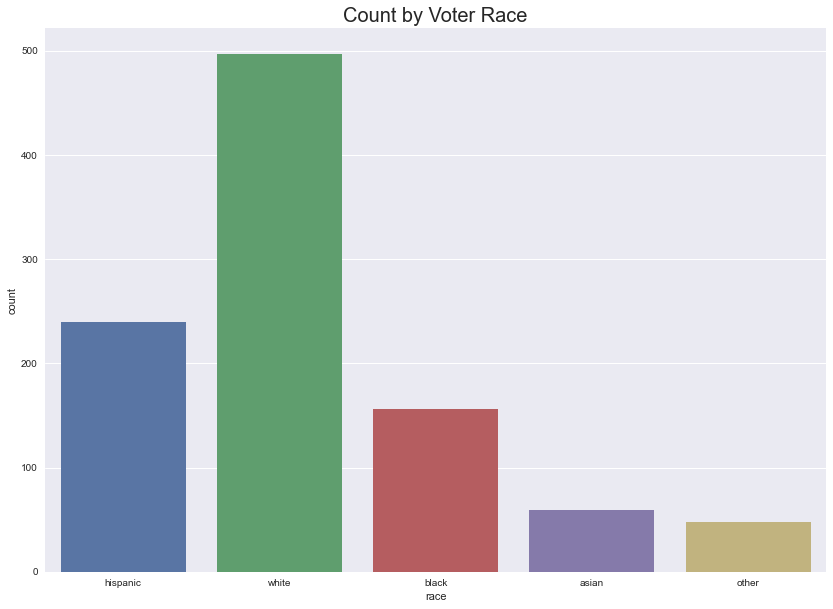

In [142]:
ax = sns.countplot(x='race',data=df).set_title('Count by Voter Race',fontsize=20)
print(df['race'].value_counts().to_string())
plt.show()

#### Assumptions

***

##### Assumption 1 - Dependent Variable
***

In [143]:
dependent = df['age']



##### Assumption 2 - Inependent Variable


In [144]:
independent = df['race']

##### Assumption 4: Outliers

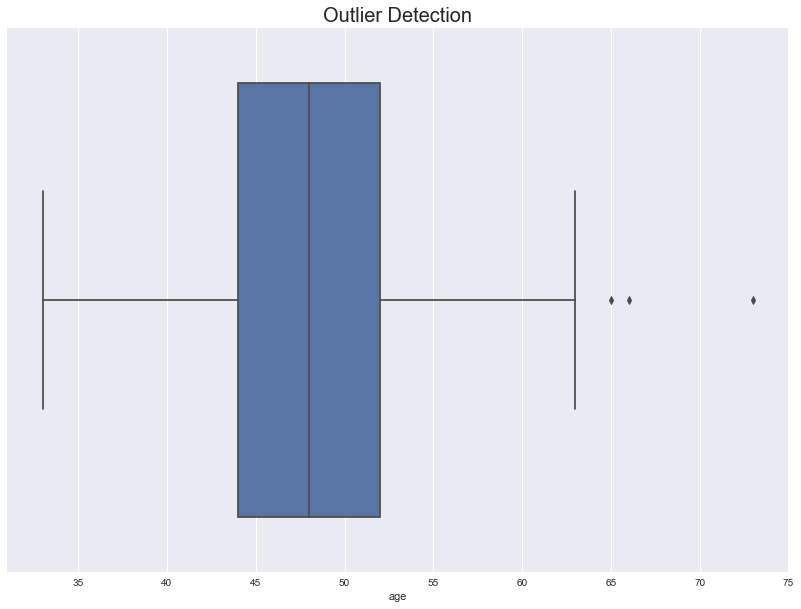

In [145]:
sns.boxplot(x=dependent).set_title('Outlier Detection',fontsize=20);

In [146]:
twenty_fifth_quantile = df.age.quantile(.25)
seventy_fifth_quantile = df.age.quantile(.75)
middle_quantile = df.age.quantile(.5)
inter_quartile_range = (seventy_fifth_quantile - twenty_fifth_quantile)*1.5

upper = seventy_fifth_quantile + inter_quartile_range

lower = twenty_fifth_quantile - inter_quartile_range

print('Boxplot Assumptions based on the following: ')
print("25th Quartile: ", round(twenty_fifth_quantile,2))
print("75th Quartile: ", round(seventy_fifth_quantile,2))
print("")
print('50th Quartile: ',round(middle_quantile,2))
print('Inter Quartile range: ',round(inter_quartile_range))
print("")
print("Boxplot upper limit: ", round(upper,2))
print("Boxplot lower limit: ", round(lower,2))
print("")
print("UPPER BOXPLOT WHISKER - The 75th Quartile: ",round(seventy_fifth_quantile,2)," added with Interquartile range: ",round(inter_quartile_range,2)," sets upper whisker in the boxplot which is: ",round(seventy_fifth_quantile+inter_quartile_range,2))
print("LOWER BOXPLOT WHISKER The 25th Quartile: ",round(twenty_fifth_quantile,2)," subtraceted from Interquartile range: ",round(inter_quartile_range,2)," sets upper whisker in the boxplot which is: ",round(twenty_fifth_quantile-inter_quartile_range,2))

Boxplot Assumptions based on the following: 
25th Quartile:  44.0
75th Quartile:  52.0

50th Quartile:  48.0
Inter Quartile range:  12.0

Boxplot upper limit:  64.0
Boxplot lower limit:  32.0

UPPER BOXPLOT WHISKER - The 75th Quartile:  52.0  added with Interquartile range:  12.0  sets upper whisker in the boxplot which is:  64.0
LOWER BOXPLOT WHISKER The 25th Quartile:  44.0  subtraceted from Interquartile range:  12.0  sets upper whisker in the boxplot which is:  32.0


In [147]:
lower_outlier_count = df['age'].min() < lower
print("Values outside Lower Limit: ",lower_outlier_count)

upper_outlier_count = df['age'].max() > upper
print("Values outside Upper Limit: ",upper_outlier_count)

print(" ")
print("Age values less than lower Whisker Value: ", df['age'][df.age < lower].count())
print("Age values greater than higher Whisker Value: ", df['age'][df.age > upper].count())

Values outside Lower Limit:  False
Values outside Upper Limit:  True
 
Age values less than lower Whisker Value:  0
Age values greater than higher Whisker Value:  3


##### Outliers by group

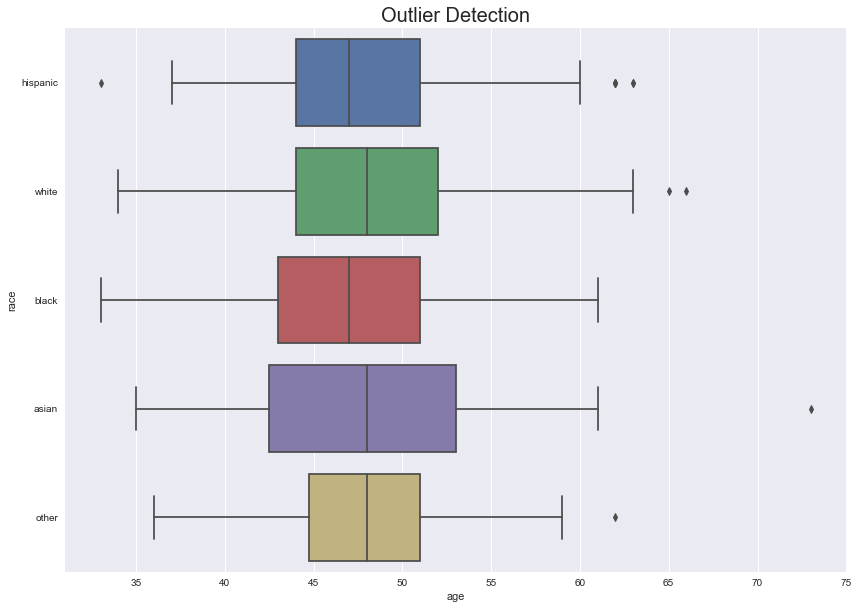

In [148]:
sns.boxplot(x=dependent, y=independent).set_title('Outlier Detection',fontsize=20);

##### Assumption 5: Normality

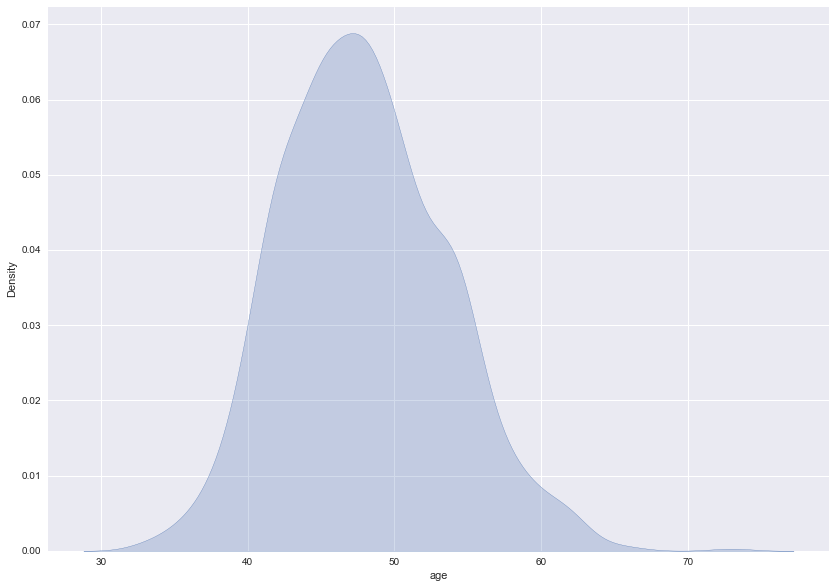

In [149]:
sns.kdeplot(dependent,fill=True);

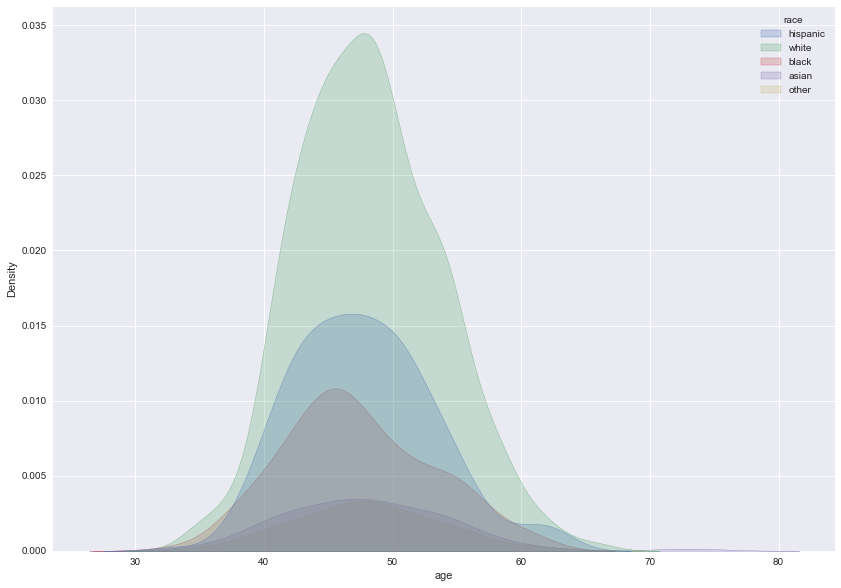

In [150]:
sns.kdeplot('age',fill=True,hue='race',data=df);

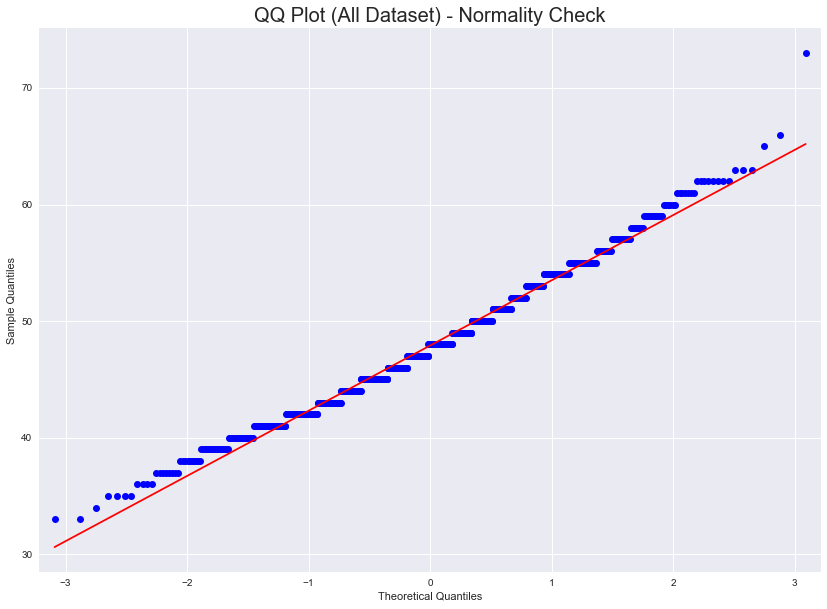

In [151]:
fig = qqplot(df['age'], line='s')
plt.title('QQ Plot (All Dataset) - Normality Check',fontsize=20)
plt.show()

In [152]:
# run shapiro wilks test
print(ss.shapiro(asian))
print(ss.shapiro(black))
print(ss.shapiro(hispanic))
print(ss.shapiro(other))
print(ss.shapiro(white))

print("\nNoraml Distribution: ",ss.shapiro(asian)[1]>0.05)
print("Noraml Distribution: ",ss.shapiro(black)[1]>0.05)
print("Noraml Distribution: ",ss.shapiro(hispanic)[1]>0.05)
print("Noraml Distribution: ",ss.shapiro(other)[1]>0.05)
print("Noraml Distribution: ",ss.shapiro(white)[1]>0.05)

# p value > 0.05 data consdiered normal

ShapiroResult(statistic=0.946333646774292, pvalue=0.011409440077841282)
ShapiroResult(statistic=0.9831177592277527, pvalue=0.053677771240472794)
ShapiroResult(statistic=0.981705904006958, pvalue=0.0034520502667874098)
ShapiroResult(statistic=0.989307165145874, pvalue=0.9370788335800171)
ShapiroResult(statistic=0.9904409646987915, pvalue=0.0026036733761429787)

Noraml Distribution:  False
Noraml Distribution:  True
Noraml Distribution:  False
Noraml Distribution:  True
Noraml Distribution:  False


##### perform ANOVA


In [153]:
ss.f_oneway(asian,black,other,hispanic,white)

F_onewayResult(statistic=0.7705313125195967, pvalue=0.5444533964862877)

* p_value too high to be statistically sigificant so no difference between means

##### Post-Hoc Testing

In [154]:
# Perform the test.
welch_anova_np(asian,black,other,hispanic,white)

F_onewayResult(statistic=0.7371488689494672, pvalue=0.5677103311337803)

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8068,0.87,-3.1448,1.5312,False
asian,hispanic,-0.3642,0.9,-2.5871,1.8587,False
asian,other,-0.06,0.9,-3.0335,2.9134,False
asian,white,0.0432,0.9,-2.0633,2.1496,False
black,hispanic,0.4426,0.9,-1.1306,2.0159,False
black,other,0.7468,0.9,-1.7781,3.2717,False
black,white,0.85,0.4641,-0.5539,2.2539,False
hispanic,other,0.3042,0.9,-2.1146,2.7229,False
hispanic,white,0.4074,0.8798,-0.7951,1.6098,False
other,white,0.1032,0.9,-2.2089,2.4154,False


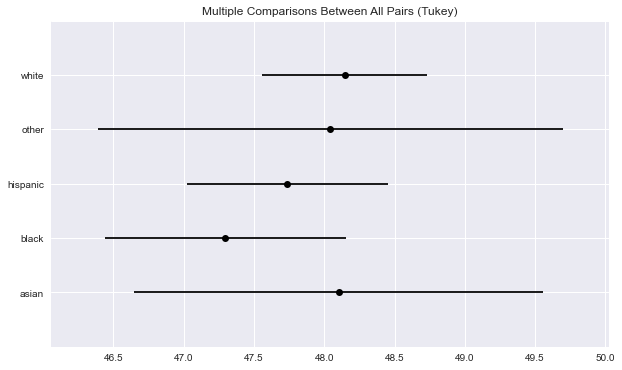

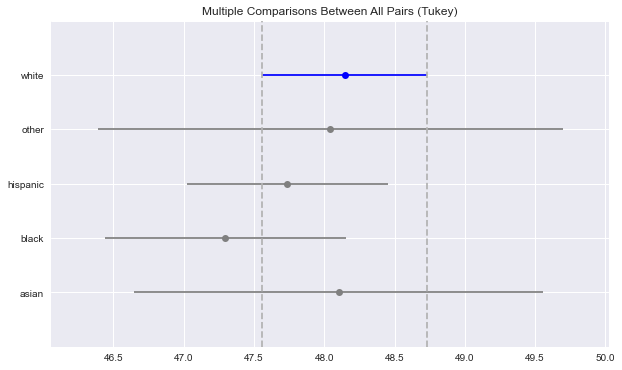

In [155]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dependent,
                          groups=independent,
                          alpha=0.05)

#display results
tukey.plot_simultaneous()
tukey.plot_simultaneous(comparison_name='white')

#display results
tukey.summary()

* The Tukey plot has all variables overlaping. This reflects the reject column in the tukey table

* apply different distribution for white ages

In [156]:
white_ages = ss.poisson.rvs(loc=18,mu=32,size=1000)

In [157]:
voter_age = np.where(voter_race=='white',white_ages,voter_age)

df = pd.DataFrame({'race':voter_race,'age':voter_age})
groups = df.groupby('race').groups

In [158]:
#create groups
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
other = voter_age[groups['other']]
white = voter_age[groups['white']]

white       497
hispanic    240
black       156
asian        59
other        48


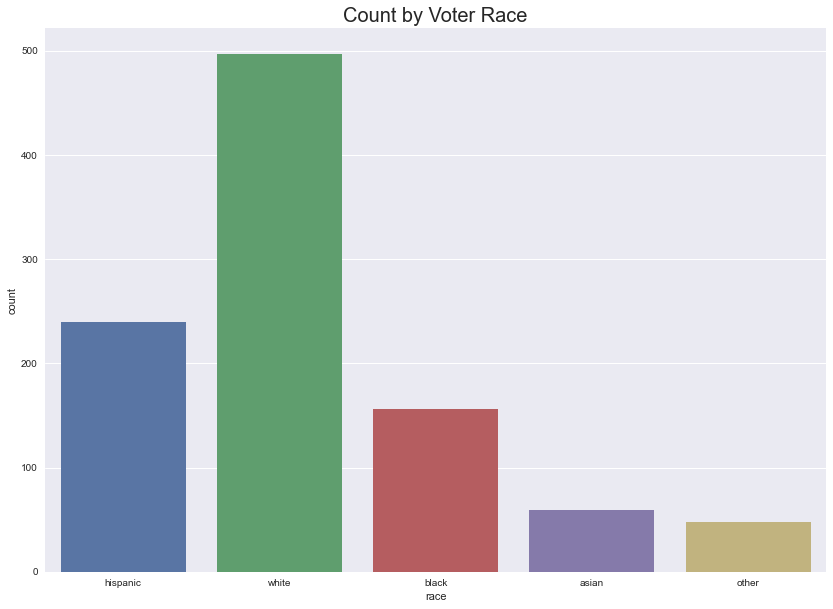

In [159]:
ax = sns.countplot(x='race',data=df).set_title('Count by Voter Race',fontsize=20)
print(df['race'].value_counts().to_string())
plt.show()

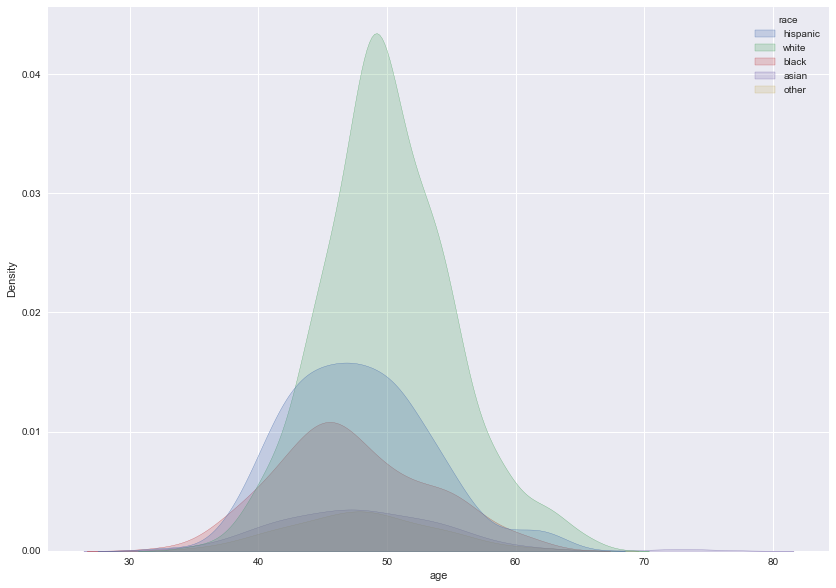

In [160]:
sns.kdeplot('age',fill=True,hue='race',data=df);

#### Assumptions

In [161]:
#assumption 1 
dependent = df['age']

#assumption 2
idependent = df['race']

In [162]:
#assumption 4
twenty_fifth_quantile = df.age.quantile(.25)
seventy_fifth_quantile = df.age.quantile(.75)
middle_quantile = df.age.quantile(.5)
inter_quartile_range = (seventy_fifth_quantile - twenty_fifth_quantile)*1.5

upper = seventy_fifth_quantile + inter_quartile_range

lower = twenty_fifth_quantile - inter_quartile_range

print('Boxplot Assumptions based on the following: ')
print("25th Quartile: ", round(twenty_fifth_quantile,2))
print("75th Quartile: ", round(seventy_fifth_quantile,2))
print("")
print('50th Quartile: ',round(middle_quantile,2))
print('Inter Quartile range: ',round(inter_quartile_range))
print("")
print("Boxplot upper limit: ", round(upper,2))
print("Boxplot lower limit: ", round(lower,2))
print("")
print("UPPER BOXPLOT WHISKER - The 75th Quartile: ",round(seventy_fifth_quantile,2)," added with Interquartile range: ",round(inter_quartile_range,2)," sets upper whisker in the boxplot which is: ",round(seventy_fifth_quantile+inter_quartile_range,2))
print("LOWER BOXPLOT WHISKER The 25th Quartile: ",round(twenty_fifth_quantile,2)," subtraceted from Interquartile range: ",round(inter_quartile_range,2)," sets upper whisker in the boxplot which is: ",round(twenty_fifth_quantile-inter_quartile_range,2))

Boxplot Assumptions based on the following: 
25th Quartile:  45.0
75th Quartile:  52.25

50th Quartile:  49.0
Inter Quartile range:  11.0

Boxplot upper limit:  63.12
Boxplot lower limit:  34.12

UPPER BOXPLOT WHISKER - The 75th Quartile:  52.25  added with Interquartile range:  10.88  sets upper whisker in the boxplot which is:  63.12
LOWER BOXPLOT WHISKER The 25th Quartile:  45.0  subtraceted from Interquartile range:  10.88  sets upper whisker in the boxplot which is:  34.12


In [163]:
lower_outlier_count = df['age'].min() < lower
print("Values outside Lower Limit: ",lower_outlier_count)

upper_outlier_count = df['age'].max() > upper
print("Values outside Upper Limit: ",upper_outlier_count)

print(" ")
print("Age values less than lower Whisker Value: ", df['age'][df.age < lower].count())
print("Age values greater than higher Whisker Value: ", df['age'][df.age > upper].count())

Values outside Lower Limit:  True
Values outside Upper Limit:  True
 
Age values less than lower Whisker Value:  2
Age values greater than higher Whisker Value:  5


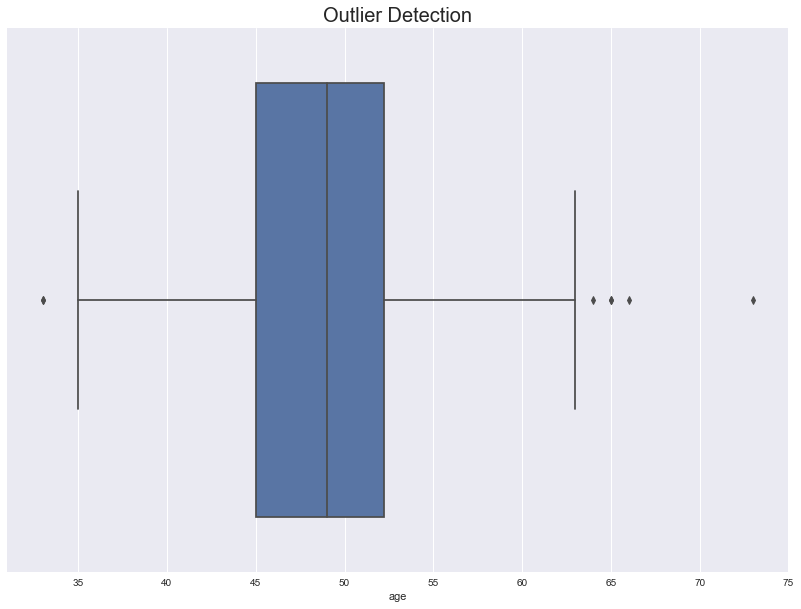

In [164]:
sns.boxplot(x=dependent).set_title('Outlier Detection',fontsize=20);

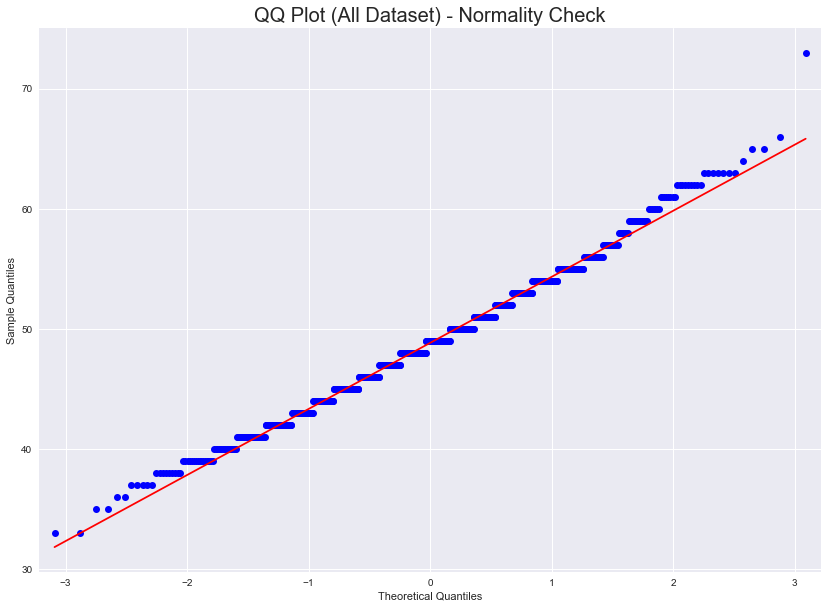

In [165]:
#assumption 5

fig = qqplot(df['age'], line='s')
plt.title('QQ Plot (All Dataset) - Normality Check',fontsize=20)
plt.show()

In [166]:
# run shapiro wilks test
print(ss.shapiro(asian))
print(ss.shapiro(black))
print(ss.shapiro(hispanic))
print(ss.shapiro(other))
print(ss.shapiro(white))

# p value > 0.05 consdier data normal

ShapiroResult(statistic=0.946333646774292, pvalue=0.011409440077841282)
ShapiroResult(statistic=0.9831177592277527, pvalue=0.053677771240472794)
ShapiroResult(statistic=0.981705904006958, pvalue=0.0034520502667874098)
ShapiroResult(statistic=0.989307165145874, pvalue=0.9370788335800171)
ShapiroResult(statistic=0.9884627461433411, pvalue=0.0005852965405210853)


In [167]:
# Perform the test.
welch_anova_np(asian,black,other,hispanic,white)

F_onewayResult(statistic=12.614996672360881, pvalue=4.217122520816813e-09)

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8068,0.8481,-3.0529,1.4392,False
asian,hispanic,-0.3642,0.9,-2.4997,1.7713,False
asian,other,-0.06,0.9,-2.9165,2.7965,False
asian,white,1.9607,0.0629,-0.0629,3.9843,False
black,hispanic,0.4426,0.9,-1.0687,1.954,False
black,other,0.7468,0.9,-1.6788,3.1724,False
black,white,2.7675,0.001,1.4188,4.1162,True
hispanic,other,0.3042,0.9,-2.0194,2.6278,False
hispanic,white,2.3249,0.001,1.1697,3.48,True
other,white,2.0207,0.0944,-0.2005,4.2419,False


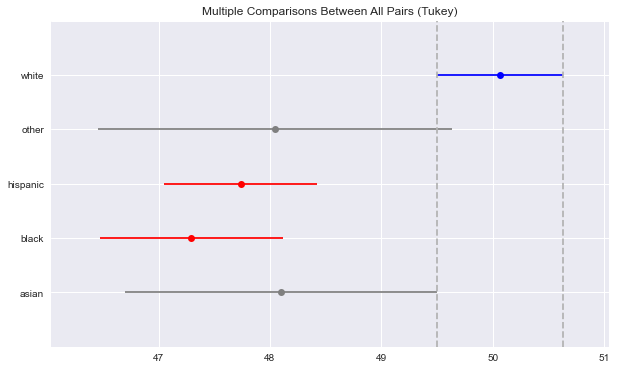

In [168]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dependent, #data
                          groups=independent, #groups
                          alpha=0.05) # significance level


tukey.plot_simultaneous(comparison_name='white')

#display results
tukey.summary()


* Observing the Tukey table and plots now, no overlap with white/hispanic and white/black.
* Reflect in Tukey summary table as *True* in the reject column
* Null hypothesis rejected between black/white voters
* Null hypothesis rejected between aisan/white voters
* For the others we can't reject the null hypothesis

***

# End